Car Prices Notebook

price_diff = sellingprice - mmr

price_diff_pct = sellingprice / mmr - 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("D:/data-analyst-portfolio/data/car_prices.csv")
pd.set_option("display.float_format", "{:,.2f}".format)

df.head(20)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.00,"16,639.00",white,black,kia motors america inc,"20,500.00","21,500.00",Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.00,"9,393.00",white,beige,kia motors america inc,"20,800.00","21,500.00",Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.00,"1,331.00",gray,black,financial services remarketing (lease),"31,900.00","30,000.00",Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.00,"14,282.00",white,black,volvo na rep/world omni,"27,500.00","27,750.00",Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.00,"2,641.00",gray,black,financial services remarketing (lease),"66,000.00","67,000.00",Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.00,"5,554.00",gray,black,enterprise vehicle exchange / tra / rental / t...,"15,350.00","10,900.00",Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.00,"14,943.00",black,black,the hertz corporation,"69,000.00","65,000.00",Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.00,"28,617.00",black,black,enterprise vehicle exchange / tra / rental / t...,"11,900.00","9,800.00",Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.00,"9,557.00",white,black,audi mission viejo,"32,100.00","32,250.00",Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.00,"4,809.00",red,black,d/m auto sales inc,"26,300.00","17,500.00",Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


In [4]:
df.columns
df.shape

(558837, 16)

In [5]:
df.isna().mean().sort_values(ascending=False).head(10)

transmission   0.12
body           0.02
condition      0.02
trim           0.02
model          0.02
make           0.02
color          0.00
interior       0.00
odometer       0.00
mmr            0.00
dtype: float64

In [6]:
df.duplicated().sum()

np.int64(0)

Cleaning Data Set

1. Cleaning Date and Parsing it into datetime + creating sale_year & sale_month

In [7]:
df["saledate"] = df["saledate"].astype(str)

df["sale_dt"] = pd.to_datetime(df["saledate"].str.split(" GMT").str[0], errors = "coerce")

df["sale_year"] = df["sale_dt"].dt.year
df["sale_month"] = df["sale_dt"].dt.month

2. Convering numeric columns

In [8]:
for col in ["mmr", "sellingprice","odometer","condition","year"]:
    df[col] = pd.to_numeric(df[col], errors = "coerce")

3. Cleaning dataset from unrealistic Odometer, preventing divide by 0, getting car age

In [9]:
clean = df.copy()

clean = clean.dropna(subset=["mmr", "sellingprice", "odometer", "year", "sale_dt"])

clean = clean[(clean["mmr"] > 0) & (clean["sellingprice"] > 0)]

clean = clean[clean["odometer"].between(1, 300000)]

clean["car_age"] = clean["sale_year"] - clean["year"]
clean = clean[clean["car_age"].between(0, 40)]


4. cleaning unknown for PowerBi

In [ ]:
cat_cols = ["make","model","trim","body","transmission","state","color","interior","seller"]
for c in cat_cols:
    clean[c] = clean[c].fillna("Unknown")

Adding main metrics

In [11]:
clean["price_diff"] = clean["sellingprice"] - clean["mmr"]

clean["price_diff_pct"] = clean["sellingprice"] / clean["mmr"] - 1

Sanity-check

In [12]:
clean[["mmr","sellingprice","price_diff","price_diff_pct"]].describe()

,mmr,sellingprice,price_diff,price_diff_pct
count,"557,760.00","557,760.00","557,760.00","557,760.00"
mean,"13,781.08","13,623.58",-157.50,-0.01
std,"9,672.04","9,742.55","1,756.13",0.36
min,25.00,1.00,"-87,750.00",-1.00
25%,"7,125.00","6,900.00",-800.00,-0.08
50%,"12,250.00","12,100.00",-50.00,-0.00
75%,"18,300.00","18,200.00",650.00,0.06
max,"182,000.00","230,000.00","207,200.00",71.00


6.1 Distribution of deviation from MMR (%)

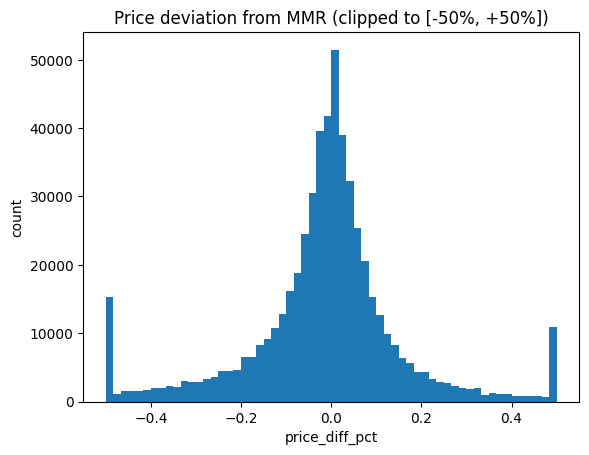

In [13]:
clean["price_diff_pct"].clip(-0.5, 0.5).plot(kind="hist", bins=60)
plt.title("Price deviation from MMR (clipped to [-50%, +50%])")
plt.xlabel("price_diff_pct")
plt.ylabel("count")
plt.show()


6.2 Average deviation by brand (Top 15 by number)

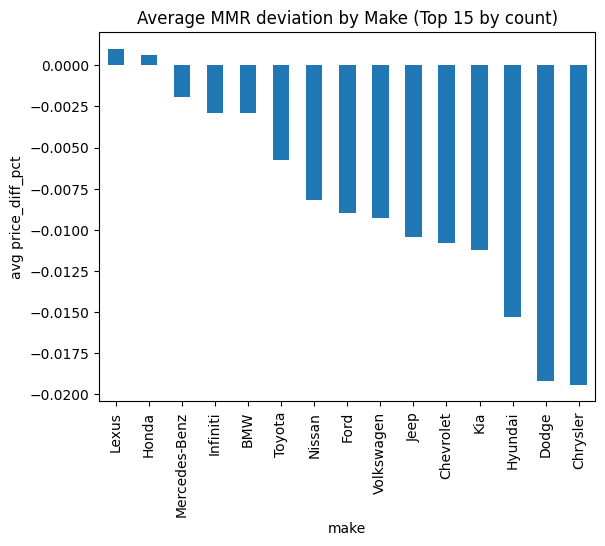

In [14]:
top_makes = clean["make"].value_counts().head(15).index
tmp = clean[clean["make"].isin(top_makes)]

by_make = tmp.groupby("make")["price_diff_pct"].mean().sort_values(ascending=False)
by_make.plot(kind="bar")
plt.title("Average MMR deviation by Make (Top 15 by count)")
plt.xlabel("make")
plt.ylabel("avg price_diff_pct")
plt.show()

6.3 Deviation from MMR by month of sale

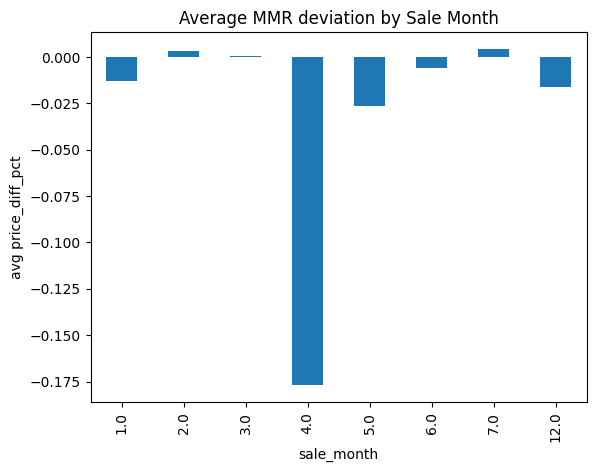

In [ ]:
by_month = clean.groupby("sale_month")["price_diff_pct"].mean()
by_month.plot(kind="bar")
plt.title("Average MMR deviation by Sale Month")
plt.xlabel("sale_month")
plt.ylabel("avg price_diff_pct")
plt.show()

6.4 Mileage vs. deviation

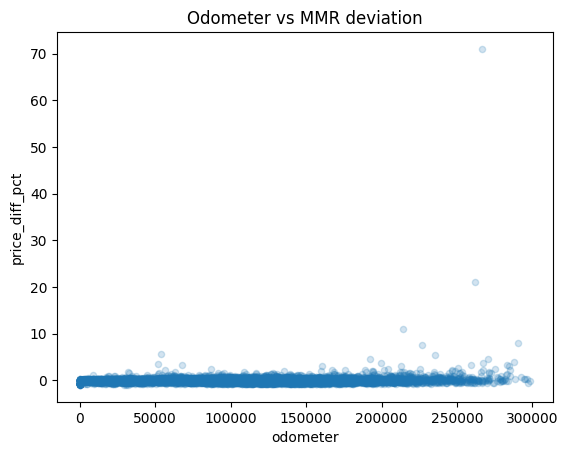

In [ ]:
sample = clean.sample(30000, random_state=42) if len(clean) > 30000 else clean
sample.plot(kind="scatter", x="odometer", y="price_diff_pct", alpha=0.2)
plt.title("Odometer vs MMR deviation")
plt.show()

Export for PowerBi

In [17]:
export = clean.drop(columns=["vin", "saledate"], errors="ignore")
export.to_csv("../data/car_prices_clean.csv", index=False)
export.head()


,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_dt,sale_year,sale_month,car_age,price_diff,price_diff_pct
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.00,"1,331.00",gray,black,financial services remarketing (lease),"31,900.00","30,000.00",2015-01-15 04:30:00,"2,015.00",1.00,1.00,"-1,900.00",-0.06
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.00,"14,282.00",white,black,volvo na rep/world omni,"27,500.00","27,750.00",2015-01-29 04:30:00,"2,015.00",1.00,0.00,250.00,0.01
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.00,"2,641.00",gray,black,financial services remarketing (lease),"66,000.00","67,000.00",2014-12-18 12:30:00,"2,014.00",12.00,0.00,"1,000.00",0.02
6,2014,BMW,M5,Base,Sedan,automatic,ca,34.00,"14,943.00",black,black,the hertz corporation,"69,000.00","65,000.00",2014-12-17 12:30:00,"2,014.00",12.00,0.00,"-4,000.00",-0.06
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,ca,2.00,"28,617.00",black,black,enterprise vehicle exchange / tra / rental / t...,"11,900.00","9,800.00",2014-12-16 13:00:00,"2,014.00",12.00,0.00,"-2,100.00",-0.18
